# #15 atmaCup 正則化の強さを変えたときの精度

---

## セットアップ

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import japanize_matplotlib

In [2]:
grid_search_results_svd = pd.read_csv('temp/grid_search_results_svd.csv')
grid_search_results_nmf = pd.read_csv('temp/grid_search_results_nmf.csv')
grid_search_results_ials = pd.read_csv('temp/grid_search_results_ials.csv')

## 予測精度の比較

In [3]:
grid_search_results_best_lr005 = pd.concat([
    (
        grid_search_results_svd
        .groupby('n_components', as_index=False)['rmse'].mean()
        .assign(method='SVD (正則化なし)')
    ),
    (
        grid_search_results_ials
        .groupby(['embedding_dim', 'reg', 'unobserved_weight'], as_index=False)['rmse'].mean()
        .groupby('embedding_dim', as_index=False)['rmse'].min()
        .rename(columns={'embedding_dim': 'n_components'})
        .assign(method='SVD (正則化あり) ※iALS')
    ),
    (
        grid_search_results_nmf
        .loc[lambda df: df['alpha_W'] == 0, :]
        .groupby(['n_components'], as_index=False)['rmse'].mean()
        .assign(method='NMF (正則化なし)')
    ),
    (
        grid_search_results_nmf
        .groupby(['n_components', 'alpha_W'], as_index=False)['rmse'].mean()
        .groupby('n_components', as_index=False)['rmse'].min()
        .assign(method='NMF (正則化あり)')
    )
], ignore_index=True)

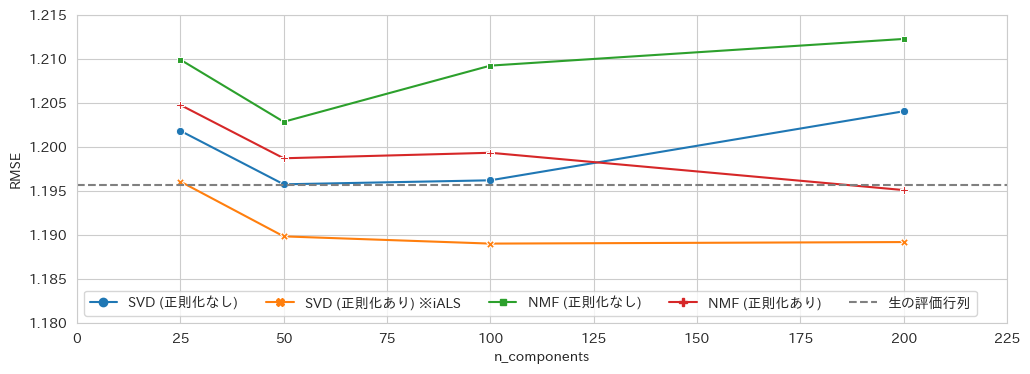

In [4]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    data=grid_search_results_best_lr005,
    x='n_components',
    y='rmse',
    hue='method',
    style='method',
    markers=True,
    dashes=False
)
plt.axhline(1.1957, label='生の評価行列', color='gray', linestyle='--')
plt.xlim(0, 225)
plt.ylim(1.180, 1.215)
plt.ylabel('RMSE')
plt.legend(ncol=5)
plt.show()

In [5]:
grid_search_results_best_lr005

,n_components,rmse,method
0,25,1.201809,SVD (正則化なし)
1,50,1.195729,SVD (正則化なし)
2,100,1.196184,SVD (正則化なし)
3,200,1.204028,SVD (正則化なし)
4,25,1.196042,SVD (正則化あり) ※iALS
5,50,1.189812,SVD (正則化あり) ※iALS
6,100,1.188992,SVD (正則化あり) ※iALS
7,200,1.189166,SVD (正則化あり) ※iALS
8,25,1.209895,NMF (正則化なし)
9,50,1.202833,NMF (正則化なし)


## iALSのグリッドサーチ結果

In [6]:
(
    grid_search_results_ials
    .groupby(['embedding_dim', 'reg', 'unobserved_weight'])['rmse'].mean()
    .unstack(level=1)
    .style.background_gradient(vmin=1.185, vmax=1.250)
)

## NMFのグリッドサーチ結果

In [7]:
(
    grid_search_results_nmf
    .groupby(['n_components', 'alpha_W'])['rmse'].mean()
    .unstack()
    .style.background_gradient(vmin=1.185, vmax=1.250)
)

alpha_W,0.000000,0.000300,0.001000,0.003000,0.010000,0.030000,0.100000
n_components,,,,,,,
25,1.209895,1.209583,1.210081,1.206764,1.204748,1.232027,1.451748
50,1.202833,1.206084,1.207553,1.208667,1.198688,1.232849,1.426319
100,1.209216,1.202897,1.203727,1.199313,1.200120,1.225843,1.374419
200,1.212248,1.206905,1.202992,1.204649,1.195074,1.223843,1.357148
